In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
pd.set_option("display.max_columns", 50)

In [4]:
# Making dataframe from clean data
df = pd.read_csv("../../clean_data/clean_victimization_data.csv")
df.head()

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"50,000 to 74,999","250,000 to 499,999",West,Urban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stranger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [5]:
# Empty dataframe for the Type of crime by hincome to be put in
graph_df = pd.DataFrame()

# For loop running through each unique hincome value and adding it to graph_df
for hincome in df['Household income'].unique():
    print(hincome)
    hincome_df = df[df['Household income'] == f"{hincome}"]
    hincome_series = hincome_df['Type of crime'].value_counts()
    by_income = hincome_series.to_frame().reset_index()
    by_income.rename(columns={by_income.columns[1]:f"{hincome}"}, inplace=True)
    
    if graph_df.empty:
        graph_df = by_income
    else:
        graph_df = graph_df.merge(by_income, on='index')

graph_df

50,000 to 74,999
25,000 to 34,999
Unknown
75,000 or more
7,500 to 14,999
35,000 to 49,999
15,000 to 24,999
Less than 7,500


,index,"50,000 to 74,999","25,000 to 34,999",Unknown,"75,000 or more","7,500 to 14,999","35,000 to 49,999","15,000 to 24,999","Less than 7,500"
0,Simple assault,3876,3239,4497,4729,2762,3717,3259,1970
1,Aggravated assault,1013,928,1368,1051,956,1072,1100,808
2,Robbery,505,558,825,551,638,546,627,475
3,Rape/sexual assault,201,232,370,259,264,242,312,308
4,Personal theft,155,134,279,284,153,161,167,114


In [6]:
# Sorting rows and columns
graph_df.rename(columns={'index':'Type of crime'}, inplace=True)
graph_df['order'] = [2, 3, 1, 4, 0]
graph_df.sort_values('order', inplace=True)
graph_df.reset_index(inplace=True)
graph_df.drop('index', axis=1, inplace=True)
graph_df.drop('order', axis=1, inplace=True)
graph_df = graph_df[['Type of crime', 'Less than 7,500', '7,500 to 14,999', '15,000 to 24,999', '25,000 to 34,999', '35,000 to 49,999', '50,000 to 74,999']]
graph_df

,Type of crime,"Less than 7,500","7,500 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999"
0,Personal theft,114,153,167,134,161,155
1,Robbery,475,638,627,558,546,505
2,Simple assault,1970,2762,3259,3239,3717,3876
3,Aggravated assault,808,956,1100,928,1072,1013
4,Rape/sexual assault,308,264,312,232,242,201


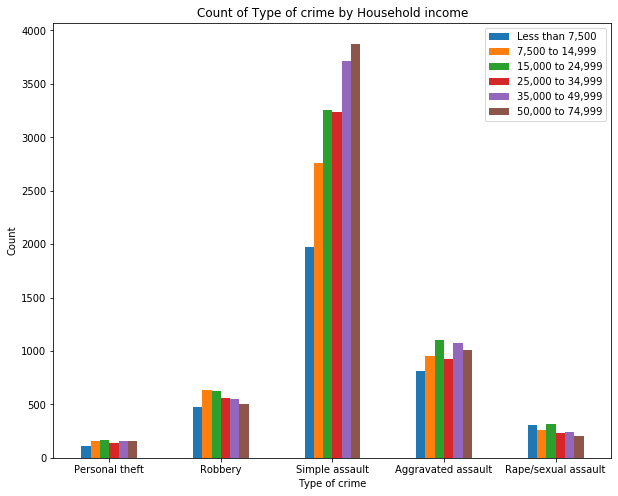

In [9]:
# Making and labeling graph
crime_by_hincome = graph_df.plot(kind='bar', figsize=(10,8))
crime_by_hincome.set_xticklabels(graph_df['Type of crime'], rotation=0)
crime_by_hincome.set_title('Count of Type of crime by Household income')
crime_by_hincome.set_xlabel('Type of crime')
crime_by_hincome.set_ylabel('Count')
crime_by_hincome
plt.savefig('crime_by_hincome')
plt.show()